# Playground to get acquainted with using MatPlotLib 3d

#### imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#may be able to remove later 
from mpl_toolkits import mplot3d

#### Plotting single points in 3 dimensional space

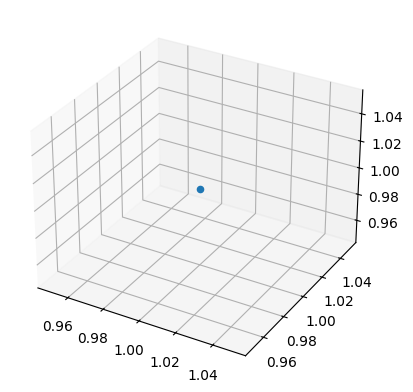

In [ ]:
# create a new axis, projection is the type of coordinate system
ax = plt.axes(projection="3d")

# scatter plot to create an individual point
ax.scatter(1,1,1)

#unnecessary in a notebook, necessary in another file
plt.show()

#### Plotting multiple points in a scatter plot

#### can customize marker (marker="v") and transparency (alpha = 0.1), etc in .scatter

Non-randomized points


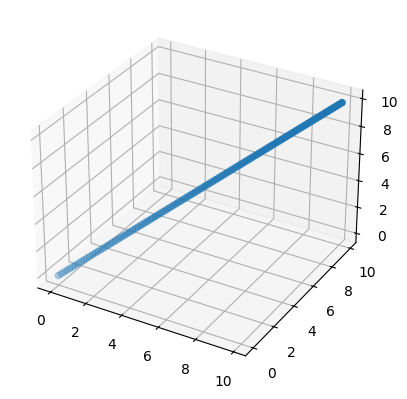

Randomized Points


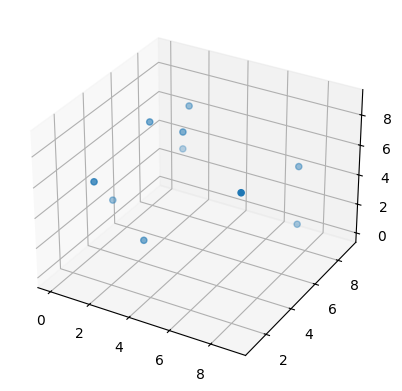

In [16]:
# creating multiple points
ax = plt.axes(projection="3d")

# creates an array of points from a to b with step size c
x_data = np.arange(0,10,0.1)
y_data = np.arange(0,10,0.1)
z_data = np.arange(0,10,0.1)

ax.scatter3D(x_data,y_data,z_data)

print("Non-randomized points")
plt.show()


ax1 = plt.axes(projection="3d")

# creates an array of 10 random points
x_data = np.random.randint(0,10, 10)
y_data = np.random.randint(0,10, 10)
z_data = np.random.randint(0,10, 10)

ax1.scatter3D(x_data,y_data, z_data)

print("Randomized Points")
plt.show()


#### Plotting functions/lines

#### use plot instead of scatter

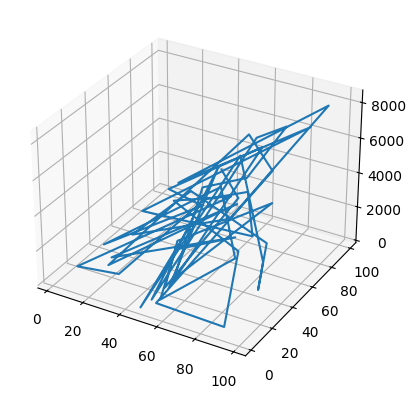

In [ ]:
ax = plt.axes(projection = "3d")

x_data = np.random.randint(0,100,50)
y_data = np.random.randint(0,100,50)
z_data = x_data * y_data

ax.plot(x_data,y_data,z_data)

plt.show()


## Formatting

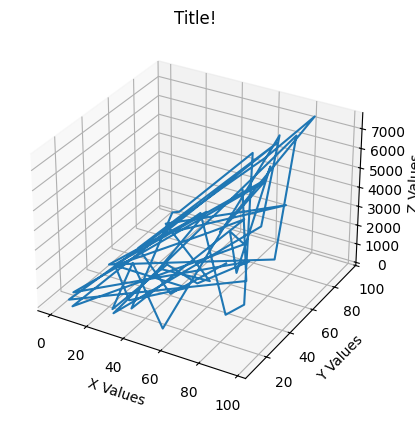

In [ ]:
ax = plt.axes(projection = "3d")

x_data = np.random.randint(0,100,50)
y_data = np.random.randint(0,100,50)
z_data = x_data * y_data

ax.set_title("Title!")
ax.set_xlabel("X Values")
ax.set_ylabel("Y Values")
ax.set_zlabel("Z Values")

ax.plot(x_data,y_data,z_data)

plt.show()

## Surface Plots


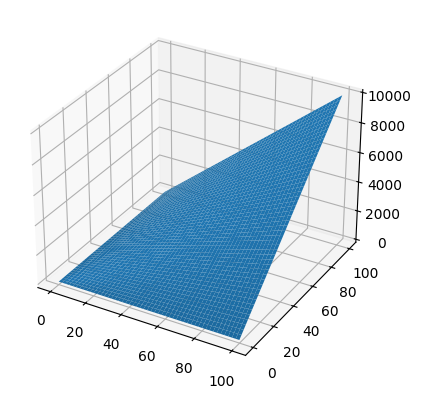

In [22]:
ax = plt.axes(projection="3d")

# produce a bunch of points on lines for x and y
x_data = np.arange(0,100,0.1)
y_data = np.arange(0,100,0.1)

# create a grid of these x and y data points
X, Y = np.meshgrid(x_data, y_data)

# as far as I understand, this is just multiplying corresponding elements 
Z = X*Y

ax.plot_surface(X,Y,Z)

plt.show()



## Formatting

#### Can mess with color maps while plotting and set the initial view of the plot

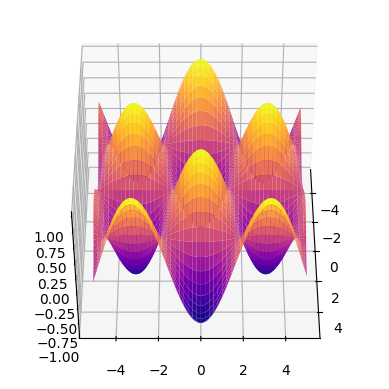

In [26]:
ax = plt.axes(projection="3d")

x_data = np.arange(-5,5,0.1)
y_data = np.arange(-5,5,0.1)

X, Y = np.meshgrid(x_data, y_data)

Z = np.sin(X)*np.cos(Y)

# can initialize the view 
ax.view_init(azim=0, elev=45)
ax.plot_surface(X,Y,Z, cmap="plasma") # coloring the surface, other color maps available


plt.show()